In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import img_to_array
from keras.optimizers import SGD
from keras.models import model_from_json, load_model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from preprocess_image import preprocess

import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import cv2
import os

Using TensorFlow backend.


# Trying home-made pretrained MNIST model with validation 80% accuracy

In [63]:
json_file = open("model80.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model80.h5")

print("Loaded model")

Loaded model


In [93]:
predictions = []
for d in data:
    predictions.append(np.argmax(loaded_model.predict(d.reshape(1,28,28,1))))

In [94]:
labels = [int(label) for label in labels]

accuracy_score(labels, predictions)

0.86245353159851301

# Trying downloaded pretrained model with 99% accuracy

In [95]:
model_99 = load_model("cnn.h5")

/home/niraj/anaconda3/envs/fastai/lib/python3.6/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [96]:
data = np.array(data, dtype="float") / 255.0
predictions = []

for d in data:
    predictions.append(np.argmax(model_99.predict(d.reshape(1,28,28,1))))

In [ ]:
accuracy_score(labels, predictions)

# Training from scratch

In [13]:
# initialize the data and labels
data = []
labels = []

# loop over the input images
for imagePath in paths.list_images("data"):
# load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = preprocess(image, 28, 28)
    image = img_to_array(image)
    data.append(image)
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

In [14]:
# from keras.utils import np_utils
# labels = np_utils.to_categorical(labels, num_classes=8)
data = np.array(data, dtype="float") / 255.0

In [37]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

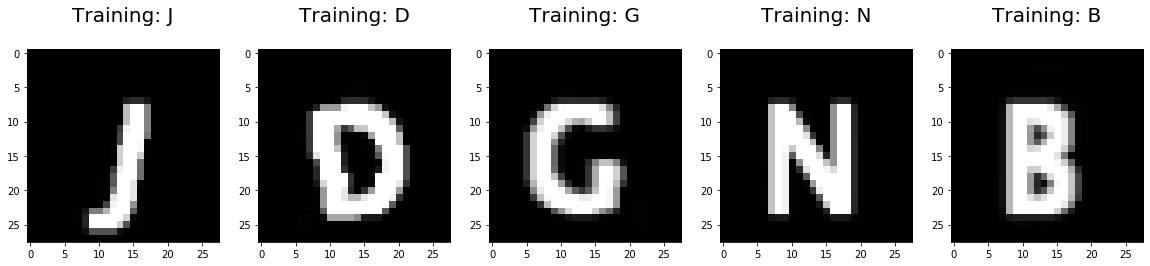

In [17]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_test[0:5], y_test[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %s\n' % str(label), fontsize = 20)

In [38]:
label_binarizer = LabelBinarizer().fit(y_train)
y_train_ = label_binarizer.transform(y_train)
y_test = label_binarizer.transform(y_test)

In [69]:
pred_dict = sorted(dict(set([(np.argmax(onehot),label) for onehot, label in zip(y_train_, y_train)])).items(), key = lambda x: x[0])

In [21]:
X_train.shape

(615, 28, 28, 1)

In [22]:
num_classes = y_train.shape[1]

In [23]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2,2)))
	model.add(Flatten())
	model.add(Dropout(0.2))
	model.add(Dense(300, activation='relu'))
	model.add(Dense(300, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [27]:
model = baseline_model()

In [31]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10)

Train on 615 samples, validate on 154 samples
Epoch 1/10
615/615 [==============================] - 1s 876us/step - loss: 0.0474 - acc: 0.9919 - val_loss: 0.7928 - val_acc: 0.8896
Epoch 2/10
615/615 [==============================] - 1s 884us/step - loss: 0.0396 - acc: 0.9935 - val_loss: 0.7017 - val_acc: 0.8896
Epoch 3/10
615/615 [==============================] - 1s 897us/step - loss: 0.0469 - acc: 0.9902 - val_loss: 0.7705 - val_acc: 0.8961
Epoch 4/10
615/615 [==============================] - 1s 838us/step - loss: 0.1060 - acc: 0.9837 - val_loss: 0.7022 - val_acc: 0.8766
Epoch 5/10
615/615 [==============================] - 1s 870us/step - loss: 0.0915 - acc: 0.9789 - val_loss: 0.8236 - val_acc: 0.8636
Epoch 6/10
615/615 [==============================] - 1s 862us/step - loss: 0.0491 - acc: 0.9935 - val_loss: 0.6503 - val_acc: 0.8831
Epoch 7/10
615/615 [==============================] - 1s 927us/step - loss: 0.0420 - acc: 0.9919 - val_loss: 0.5815 - val_acc: 0.9091
Epoch 8/10
615/6

In [32]:
model.save("gujrat_baseline.h5")

In [34]:
model.predict(X_test)

array([[7.78005660e-09, 1.43501921e-08, 1.58114410e-10, ...,
        1.03021529e-10, 5.77819662e-07, 8.17709678e-10],
       [7.80240239e-13, 5.18559584e-10, 7.43852476e-15, ...,
        2.17898987e-25, 1.59743902e-26, 5.80383623e-22],
       [6.83052139e-12, 8.74564229e-15, 1.05097264e-23, ...,
        9.05190626e-23, 1.51261190e-28, 3.33947967e-20],
       ...,
       [1.83877876e-06, 3.94984818e-04, 4.01748251e-03, ...,
        6.30042807e-04, 1.03658542e-01, 1.41592976e-02],
       [1.52730476e-14, 1.11518962e-11, 3.51979904e-19, ...,
        1.43976508e-25, 3.23672870e-29, 8.84169896e-24],
       [8.43584402e-09, 6.96794416e-07, 1.42131476e-05, ...,
        5.22891802e-14, 2.81031931e-09, 1.71914462e-11]], dtype=float32)

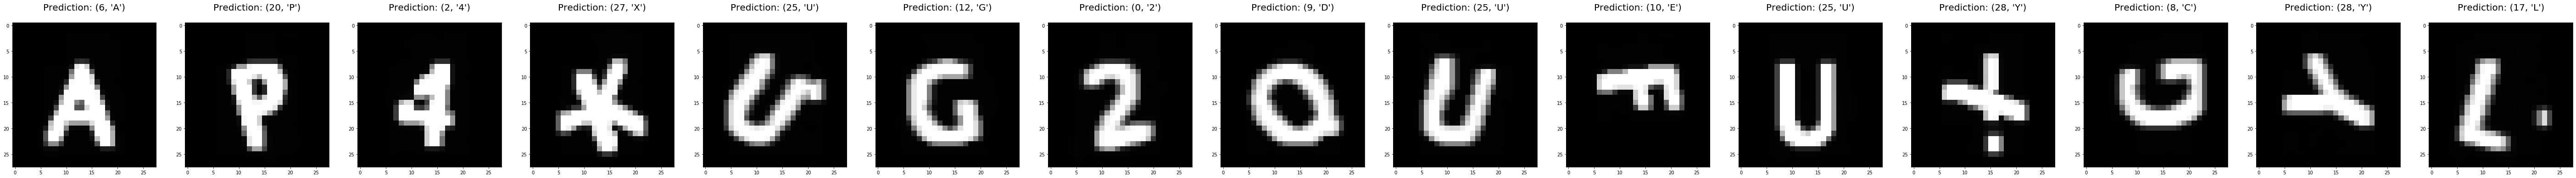

In [80]:
plt.figure(figsize=(100,20))
for index, (image, label) in enumerate(zip(X_test[15:30], y_test[0:15])):
    plt.subplot(1, 15, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    pred = model.predict(image.reshape(1,28,28,1))
    plt.title('Prediction: %s\n' % str(pred_dict[np.argmax(pred)]), fontsize = 20)

In [79]:
pred_dict

[(0, '2'),
 (1, '3'),
 (2, '4'),
 (3, '5'),
 (4, '7'),
 (5, '8'),
 (6, 'A'),
 (7, 'B'),
 (8, 'C'),
 (9, 'D'),
 (10, 'E'),
 (11, 'F'),
 (12, 'G'),
 (13, 'H'),
 (14, 'I'),
 (15, 'J'),
 (16, 'K'),
 (17, 'L'),
 (18, 'N'),
 (19, 'O'),
 (20, 'P'),
 (21, 'Q'),
 (22, 'R'),
 (23, 'S'),
 (24, 'T'),
 (25, 'U'),
 (26, 'V'),
 (27, 'X'),
 (28, 'Y'),
 (29, 'É')]